https://www.kaggle.com/code/arunimsamudra/k-nn-with-hyperparameter-tuning/notebook

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns # for data visualiztions

ModuleNotFoundError: No module named 'seaborn'

In [25]:
path = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'

df = pd.read_csv(path)


In [26]:
df.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [27]:
# Separate the dependent and independent features
X = df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]
y = df['variety']

In [28]:
# Standardize the data and then concatenate it with y
data = X
data_std = (data - data.mean())/(data.max() - data.min())
data = pd.concat([data_std,y], axis=1)

In [29]:
# reshape the dataframe using melt()
data = pd.melt(data, id_vars = 'variety', var_name = 'features',value_name = 'value')
#data.rename(columns={"variety": "Species"})

In [30]:
data

,variety,features,value
0,Setosa,sepal.length,-0.206481
1,Setosa,sepal.length,-0.262037
2,Setosa,sepal.length,-0.317593
3,Setosa,sepal.length,-0.345370
4,Setosa,sepal.length,-0.234259
...,...,...,...
595,Virginica,petal.width,0.458611
596,Virginica,petal.width,0.291944
597,Virginica,petal.width,0.333611
598,Virginica,petal.width,0.458611


/Users/Kaemyuijang/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/Kaemyuijang/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


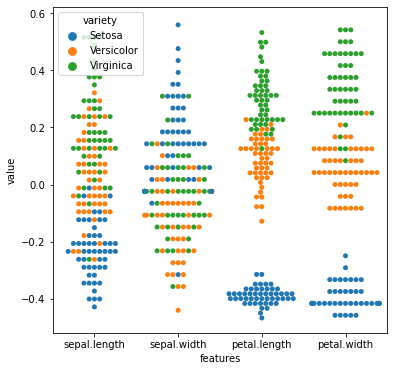

In [31]:
# swarmplot for analysing the different attributes
plt.figure(figsize = (6,6))
sns.swarmplot(x = 'features', y = 'value', hue = 'variety', data = data)
plt.show()

#### Feature Selection


In [32]:
# split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
print('Training set shape: ', X_train.shape, y_train.shape)
print('Testing set shape: ', X_test.shape, y_test.shape)


Training set shape:  (112, 4) (112,)
Testing set shape:  (38, 4) (38,)


In [33]:
from sklearn.feature_selection import chi2, SelectKBest, f_classif


In [34]:
# Get the two best(k = 2) features using the SelectKBest method
ft = SelectKBest(chi2, k = 2).fit(X_train, y_train)
print('Score: ', ft.scores_)
print('Columns: ', X_train.columns)

Score:  [ 9.17942135  2.38729628 89.33693113 51.72073323]
Columns:  Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width'], dtype='object')
